<a href="https://colab.research.google.com/github/FelipeAlvesG/Data-Science/blob/main/Data_Science_da_Atlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Arquivo da dados que foi convertido para 'CSV' para testes futuros
## pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/dados.csv')  

In [1]:
#BIBLIOTECAS A SEREM USADAS
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importando arquivo da dados em 'XLSX' conforme foi recebido, passando para uma váriavel e mostrando a quantidade de linhas e colunas 

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/dados_assinaturas.xlsx')
df.shape
print(f"Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset tem 2027 linhas e 14 colunas.


##**Arquitetura dos Dados (AD)**
######*Foi renomeado as colunas manualmente, claro que poderia ser renomeado por meio do código, mas para agilizar o relatório.*


* **id** : Número de identificação do cliente
* **data_criacao_perfil** : 'Nome sugestivo'
* **data_exclusao_perfil** : 'Nome sugestivo'
* **cod_plano** : 5 Tipos de planos(A,B,C,D,E)
* **forma_pagamento** : 'Nome sugestivo'
* **valor_plano** : 'Nome sugestivo'
* **status_plano** : 3 Status (Draft:'em andamento',Active e Canceled)
* **dia_pagamento** : 'Nome sugestivo'
* **ultimo_pagamento** : 'Data do ultima pagamento do plano'
* **proximo_pagamento** : 'Nome sugestivo'
* **data_cancel_plano** : Data e Hora do cancelamento do Plano
* **razao_cancelamento** : Motivo por que foi cancelado
* **data_perfil_criado** : 'Nome sugestivo'
* **uf_perfil** : Estado do Cadastro do Perfil


In [ ]:
df.head()

In [ ]:
df.info()

In [5]:
df.isnull().sum()

id                         0
data_criacao_perfil        0
data_exclusao_perfil    1897
cod_plano                  0
forma_pagamento            0
valor_plano                0
status_plano               0
dia_pagamento              0
ultimo_pagamento         929
proximo_pagamento        929
data_cancel_plano        430
razao_cancelamento       424
data_perfil_criado         0
uf_perfil                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [21]:
df.cod_plano.value_counts()

plano A    682
plano B    450
plano C    413
plano D    387
plano E     95
Name: cod_plano, dtype: int64

In [ ]:
df["cod_plano"].str.contains("plano A")

In [63]:
plano_a = df[df["cod_plano"].str.contains("plano A", na=False)]

In [ ]:
plano_a

In [71]:
plano_a.groupby([plano_a['status_plano']])["cod_plano"].value_counts()

status_plano   cod_plano
ACTIVE         plano A      136
CANCEL QUEUED  plano A        1
CANCELED       plano A      532
DRAFT          plano A       13
Name: cod_plano, dtype: int64

In [37]:
df.groupby([df['status_plano']])["cod_plano"].value_counts()

status_plano   cod_plano
ACTIVE         plano A      136
               plano B       78
               plano D       74
               plano C       71
               plano E       11
CANCEL QUEUED  plano D        3
               plano A        1
               plano B        1
               plano C        1
CANCELED       plano A      532
               plano B      362
               plano C      326
               plano D      298
               plano E       79
DRAFT          plano C       15
               plano A       13
               plano D       12
               plano B        9
               plano E        5
Name: cod_plano, dtype: int64

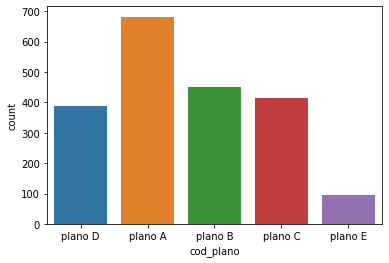

In [8]:
sns.countplot(df['cod_plano'])

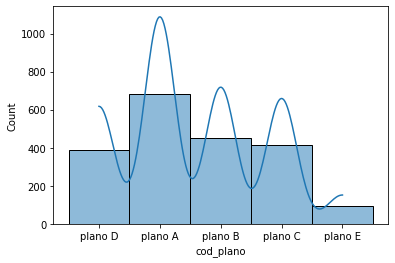

In [14]:
sns.histplot(df['cod_plano'], kde=True)

In [ ]:
sns.pairplot(df, hue='cod_plano')

In [ ]:
#antes de dropa os nulos é necessarios trata-los
df = df.dropna()

In [ ]:
status_plano_qtds = df[df['cod_plano'] == 'plano A']['status_plano'].value_counts()
status_plano_qtds